In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
market = pd.read_csv('prices_round_1_day_0.csv')
for column_headers in market.columns: 
    market_columns = column_headers.split(';')
market['market_info'] = market.iloc[:,0].str.split(';')
df = pd.DataFrame(market['market_info'].tolist(), columns=market_columns).fillna('')


In [22]:
print(df)

      day timestamp  product bid_price_1 bid_volume_1 bid_price_2  \
0       0         0   PEARLS        9998            1        9995   
1       0         0  BANANAS        4893            1        4892   
2       0       100   PEARLS        9996            1        9995   
3       0       100  BANANAS        4892           31               
4       0       200   PEARLS        9996            1        9995   
...    ..       ...      ...         ...          ...         ...   
19995   0    999700  BANANAS        4875            1        4870   
19996   0    999800   PEARLS        9995           27               
19997   0    999800  BANANAS        4869           27               
19998   0    999900   PEARLS        9996            2        9995   
19999   0    999900  BANANAS        4870           23               

      bid_volume_2 bid_price_3 bid_volume_3 ask_price_1 ask_volume_1  \
0               30                                10005           30   
1               30         

In [30]:
bananas = df.groupby('product').get_group('BANANAS')
pearls = df.groupby('product').get_group('PEARLS')
bananas = bananas.reset_index()
pearls = pearls.reset_index()

In [31]:
print(bananas)


      index day timestamp  product bid_price_1 bid_volume_1 bid_price_2  \
0         1   0         0  BANANAS        4893            1        4892   
1         3   0       100  BANANAS        4892           31               
2         5   0       200  BANANAS        4892           22               
3         7   0       300  BANANAS        4893           25               
4         9   0       400  BANANAS        4894            5        4893   
...     ...  ..       ...      ...         ...          ...         ...   
9995  19991   0    999500  BANANAS        4869           28               
9996  19993   0    999600  BANANAS        4869           29               
9997  19995   0    999700  BANANAS        4875            1        4870   
9998  19997   0    999800  BANANAS        4869           27               
9999  19999   0    999900  BANANAS        4870           23               

     bid_volume_2 bid_price_3 bid_volume_3 ask_price_1 ask_volume_1  \
0              30           

In [32]:
print(pearls)

      index day timestamp product bid_price_1 bid_volume_1 bid_price_2  \
0         0   0         0  PEARLS        9998            1        9995   
1         2   0       100  PEARLS        9996            1        9995   
2         4   0       200  PEARLS        9996            1        9995   
3         6   0       300  PEARLS        9996            2        9995   
4         8   0       400  PEARLS        9998            5        9996   
...     ...  ..       ...     ...         ...          ...         ...   
9995  19990   0    999500  PEARLS        9995           28               
9996  19992   0    999600  PEARLS        9996            2        9995   
9997  19994   0    999700  PEARLS        9996            2        9995   
9998  19996   0    999800  PEARLS        9995           27               
9999  19998   0    999900  PEARLS        9996            2        9995   

     bid_volume_2 bid_price_3 bid_volume_3 ask_price_1 ask_volume_1  \
0              30                       

Average Price
being the midprice between `Buy` and `Sell`


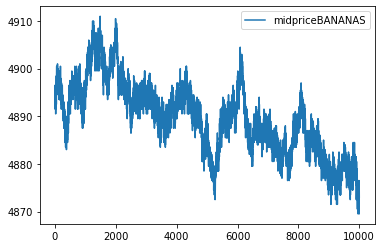

[4896.0,
 4894.0,
 4895.5,
 4896.0,
 4896.5,
 4896.0,
 4894.5,
 4895.0,
 4894.5,
 4895.0,
 4894.0,
 4894.5,
 4895.0,
 4891.5,
 4894.0,
 4896.5,
 4894.0,
 4891.5,
 4894.0,
 4893.5,
 4892.5,
 4893.5,
 4893.0,
 4893.0,
 4895.0,
 4890.5,
 4892.5,
 4893.0,
 4896.0,
 4894.0,
 4894.0,
 4894.0,
 4893.5,
 4894.0,
 4894.0,
 4893.5,
 4894.5,
 4894.0,
 4895.0,
 4895.5,
 4895.0,
 4895.5,
 4892.5,
 4895.5,
 4895.5,
 4895.5,
 4896.0,
 4892.5,
 4898.5,
 4896.0,
 4896.0,
 4896.5,
 4896.5,
 4896.5,
 4896.5,
 4898.0,
 4898.5,
 4899.0,
 4900.5,
 4898.0,
 4898.0,
 4897.0,
 4894.5,
 4897.5,
 4897.5,
 4897.5,
 4897.5,
 4897.0,
 4896.5,
 4899.0,
 4897.0,
 4896.5,
 4896.0,
 4895.5,
 4897.0,
 4897.5,
 4898.0,
 4900.5,
 4900.5,
 4897.5,
 4899.0,
 4899.0,
 4899.5,
 4900.0,
 4900.5,
 4901.0,
 4899.5,
 4897.0,
 4896.5,
 4899.0,
 4897.5,
 4897.5,
 4898.5,
 4898.5,
 4898.5,
 4899.5,
 4899.0,
 4900.0,
 4897.5,
 4898.5,
 4899.0,
 4898.5,
 4898.0,
 4895.5,
 4898.5,
 4898.5,
 4897.5,
 4899.0,
 4899.0,
 4898.0,
 4897.0,
 

In [45]:
def getMidPrices(df, prodcut_name):
    buy_prices = df['bid_price_1']
    sell_prices = df['ask_price_1']
    mid_prices = []
    for i in range(0,len(df)):
        mid_prices.append((int(buy_prices[i]) + int(sell_prices[i]))/2)
    plt.plot(mid_prices,label='midprice'+prodcut_name)
    plt.legend()
    plt.show()
    return mid_prices

getMidPrices(bananas, 'BANANAS') # should be midpricesETF